# Week 2

## Data Preparation for Customer Behavior Analysis

Here's what a typical data science project looks like:
1. Problem identification
2. **EDA**
3. **Data Cleaning**
4. **Feature Engineering**
5. Modeling
6. Project Delivery 

During this class we will discuss and work on 2, 3 and 4 points from the list above.

### Exploratory Data Analysis:

*“Exploratory data analysis” is an attitude, a state of flexibility, a willingness to look for those things that we believe are not there, as well as those we believe to be there.*
<br>
— John Tukey
<br> 
<br>
During EDA, we use plots, graphs, and summary statistics to gain more understanding and intuition about the dataset. 
<br>
<br>
Generally speaking, it’s a method of systematically going through the data, plotting distributions of all variables (using box plots), plotting time series of data, transforming variables, looking at all pairwise relationships between variables using scatterplot matrices, and generating summary statistics for all of them. [1]
<br>
<br>
<br>
**A simple guide to help you conduct EDA:**
1. Dataset overview
    - Exploring summary statistics of variables
    - Exploring NAs
2. Going deeper by examining each variable individually
    - Visualisation of each variable 
    - Outlier detection
3. Exploring the interaction of two or more variables
    - Visualisation techniques
    - Correlation matrices 

<br>

**How to clean up a dataset:**  
1. Dealing with unuseful data
2. Dealing with NAs
3. Dealing with outliers
4. Dealing with Duplicates

<br>

**Creating new features with Feature Engineering:**
1. Many new variables from datetime objects
2. Changing data type (e.g. continuous to categorical)
3. Creating dummy variables
4. Creating new variables using the sum, product, difference of two or more variables
5. Using your imagination for more 

<br>
<br>
Further you can find application to the methods and techniques described above. This is a general EDA and preprocessing analysis that can be used later for modeling. 

[Link to dataset](https://www.kaggle.com/carrie1/ecommerce-data):


"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."


In [42]:
# Packages
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date
%matplotlib inline

In [43]:
# Data 
filname = os.path.join('data', 'data.csv')
data = pd.read_csv(filname, encoding='unicode_escape')

In [44]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Exploratory Data Analysis

##### <div align="center">  Metadata </div>        

| **Column Name** |     **Description**  |  
|----------       |:-------------:       |
| InvoiceNo       |  Invoice Number      |
| StockCode       |  Product code        |
| Description     |  Product description |
| Quantity        |  Number of purchased items |
| InvoiceDate     |  Invoice Date        |
| UnitPrice       |  Price for one item  |
| CustomerID      |  Customer ID         |
| Country         |  Customer's country  |

In [45]:
# General information about dataset
# print(type(data.CustomerID.values))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [46]:
# Change data types
# data.InvoiceDate == data['InvoiceDate']
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['CustomerID'] = data['CustomerID'].astype(str)# astype('O'|str|int|float...)
# data.InvoiceNo.apply(lambda x: str(x))

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [48]:
# Describe numerical variables
data.describe()

,Quantity,InvoiceDate,UnitPrice
count,541909.000000,541909,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 11:34:00,1.250000
50%,3.000000,2011-07-19 17:17:00,2.080000
75%,10.000000,2011-10-19 11:27:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,218.081158,NaN,96.759853


In [49]:
# Describe categorical variables
data.describe(include = 'object')

,InvoiceNo,StockCode,Description,CustomerID,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,4373,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,nan,United Kingdom
freq,1114,2313,2369,135080,495478


### 1.Dealing with NAs

In [50]:
# Number of NAs and Percentage of NAs in dataset
# data.shape -> (i, j)
data_nas = pd.DataFrame(data.isna().sum(), columns=['Number of NAs'])
data_nas['Percentage of NAs'] = round(data_nas['Number of NAs'] / data.shape[0] * 100, 3)
data_nas

,Number of NAs,Percentage of NAs
InvoiceNo,0,0.000
StockCode,0,0.000
Description,1454,0.268
Quantity,0,0.000
InvoiceDate,0,0.000
UnitPrice,0,0.000
CustomerID,0,0.000
Country,0,0.000


The main goal of this EDA and future analysis is to understand the behavior of company customers, which is why we need to remove NAs in 'CustomerID' column. Moreover, by removing these values from 'Customer ID' we clean 'Description' NAs as well.

In [51]:
# Instead we can drop columns CustomerID and Description
# data = data[['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate',
#        'UnitPrice', 'Country']]
data.dropna(subset=['CustomerID'], inplace=True)

In [52]:
data.shape

(541909, 8)

In [53]:
data.isna().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

### 2. Exploring each variable separately

In [54]:
print("Numbers of observations: ", data.shape[0])
# print("Numbers of unique invoices: ", data.InvoiceNo.nunique())
# print('Number of unique customers: ', data.CustomerID.nunique())
print('Numbere of unique products:', data.StockCode.nunique())

Numbers of observations:  541909
Numbere of unique products: 4070


In [55]:
for i in data.columns:
    print(f"Column name:{i}",
          "\nUnique values: ", data[i].unique(),
          "\nNumber of unique values: ", data[i].nunique(), "\n____")

Column name:InvoiceNo 
Unique values:  ['536365' '536366' '536367' ... '581585' '581586' '581587'] 
Number of unique values:  25900 
____
Column name:StockCode 
Unique values:  ['85123A' '71053' '84406B' ... '90214U' '47591b' '23843'] 
Number of unique values:  4070 
____
Column name:Description 
Unique values:  ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE'] 
Number of unique values:  4223 
____
Column name:Quantity 
Unique values:  [     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22   

Here we can see the huge difference between number of observations and numbers of unique orders, which means that database has no order level structure. 

##### Continuous data visualisation

C:\Users\User\AppData\Local\Temp\ipykernel_6544\548746408.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Quantity)


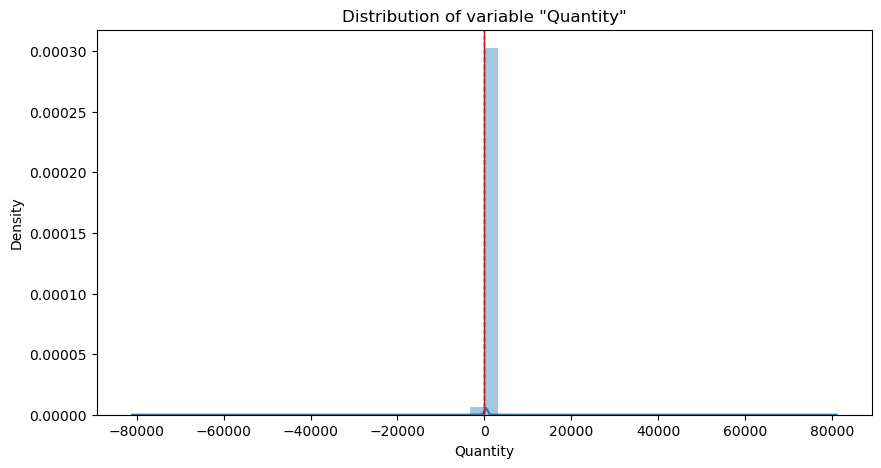

In [56]:
plt.figure(figsize=(10, 5))
sns.distplot(data.Quantity)
plt.axvline(data.Quantity.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data.Quantity.median(), color='r', linewidth=1)
plt.title('Distribution of variable "Quantity"')
plt.xlabel("Quantity")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_6544\415729051.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.UnitPrice)


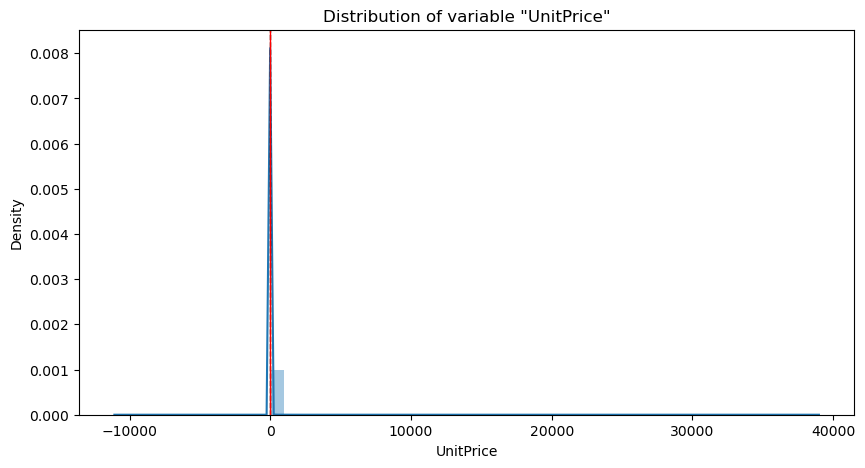

In [57]:
plt.figure(figsize=(10, 5)) 
sns.distplot(data.UnitPrice)
plt.axvline(data.UnitPrice.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data.UnitPrice.median(), color='r', linewidth=1)
plt.title('Distribution of variable "UnitPrice"')
plt.xlabel("UnitPrice")
plt.show()

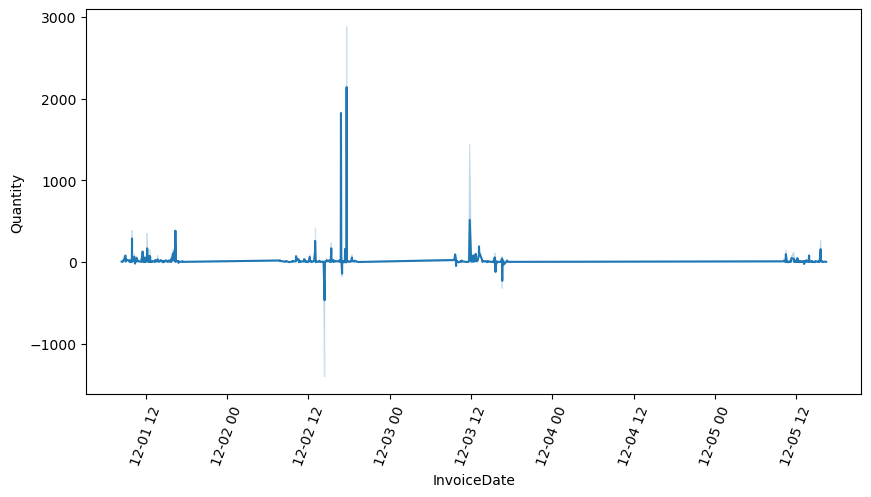

CPU times: total: 5.69 s
Wall time: 5.76 s


In [58]:
%%time
plt.figure(figsize=(10,5))
sns.lineplot(x=data.InvoiceDate[:10000], y=data.Quantity[:10000]) # Boxplot
plt.xticks(rotation = 70)
plt.show()

Both of the above graphs show that we have outliers for both variables. We will explore them more deeply.

In [59]:
# Datetime variable
data['InvoiceDate'].describe()

count                           541909
mean     2011-07-04 13:34:57.156386048
min                2010-12-01 08:26:00
25%                2011-03-28 11:34:00
50%                2011-07-19 17:17:00
75%                2011-10-19 11:27:00
max                2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In analyzing customer behavior, date and time variables will play a major role in solving various types of problems. This will be useful later in the analysis of retention, loyalty, segmentation, etc. 

##### Categorical data visualisation

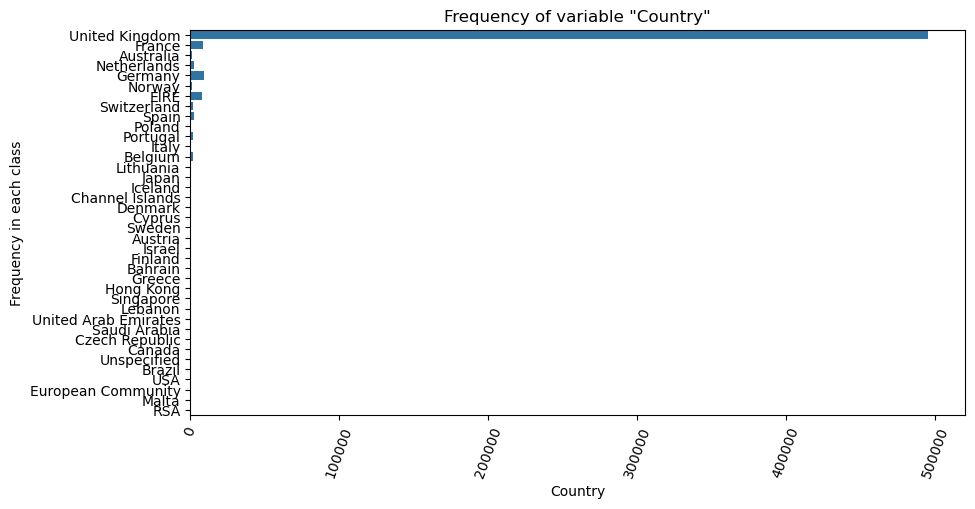

In [60]:
# With continuous - Histpgram , with categorical -  Barplot 
plt.figure(figsize=(10,5))
sns.countplot(data.Country) # Barplot 
plt.title('Frequency of variable "Country"')
plt.xlabel("Country")
plt.ylabel("Frequency in each class")
plt.xticks(rotation = 70)
plt.show()

Most customers are based in UK. From the point of view of the 'Country' variable, the data is highly imbalanced.
<br>
<br>
There is no need to visualize other categorical variables, because these variables have many unique values and we can't gain any valuable information from it.

### 3. Outlier detection

In [61]:
data.Quantity.describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [62]:
data.UnitPrice.describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

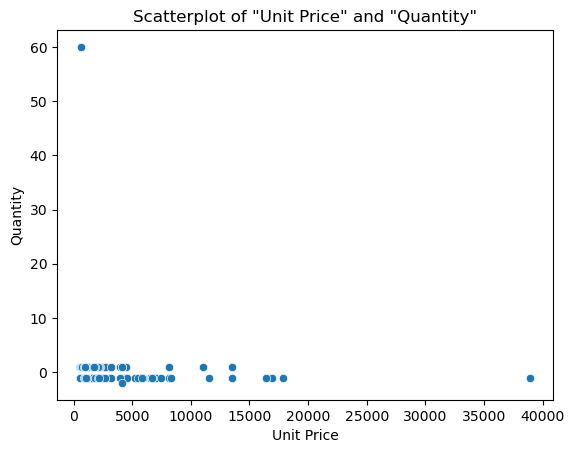

In [63]:
# Exploring large values  of 'UnitPrice' variable
larges = data[data['UnitPrice']>=500] # .loc but it's not that beautiful 
sns.scatterplot(data = larges, x = 'UnitPrice', y = 'Quantity')
plt.title('Scatterplot of "Unit Price" and "Quantity"')
plt.xlabel("Unit Price")
plt.ylabel("Quantity")
plt.show()

In [64]:
#Let's look at categorical variables of this part of the data once again
larges.describe(include = 'object')

,InvoiceNo,StockCode,Description,CustomerID,Country
count,255,255,255,255,255
unique,250,10,10,34,10
top,557377,DOT,DOTCOM POSTAGE,nan,United Kingdom
freq,2,105,105,169,208


In [65]:
# Unique values of 'StockCode' variable.
larges.StockCode.unique()

array(['DOT', 'M', 'AMAZONFEE', 'BANK CHARGES', 'D', 'POST', '22502', 'S',
       'B', 'CRUK'], dtype=object)

In [66]:
# Unique values of 'Description' variable.
# larges.Description.unique()

**Some assumptions:**
1. From the plot above and from the description of the 'Quantity' variable, it is clear that we have a lot of data issues. First of all, the quantity variable cannot take a negative value. Moreover, our maximum value is very large. It is doubtful that a customer can buy the same product so many times. 
<br>
<br>
2. Next variable with outliers is 'UnitPrice'. The only problem with this is the very large values.To understand the reasons for their occurrence, we only consider observations at unit prices of 500 or more. Some interesting relations can be found:
    <br>
    2.1 High unit prices mostly have negative values for the Quantity variable. 
    <br>
    2.2 The variables 'StockCode 'and' Description 'show that these observations are basically not ordinary products.  
<br>
<br>

**What to do next:**
1. Remove negative and very large values from 'Quantity' variable.
2. Remove StockCode and Description values which do not apply to usual products.

In [67]:
# Remove negative values from 'Quantity' variable and very large values of 'Quantity' variable
filtered = data[data['Quantity'] >= 0]
filtered = filtered[filtered['Quantity']<5000]

In [68]:
# Remove not real product codes from StockCode and very large values of 'Unit Price' variable
vals = ['M', 'D', 'POST',  'DOT', 'CRUK']
filtered = filtered[~filtered['StockCode'].isin(vals)] # Syntactic Suger sample

filtered = filtered[filtered['UnitPrice']<500]

C:\Users\User\AppData\Local\Temp\ipykernel_6544\3563914639.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered.Quantity)


<Axes: xlabel='Quantity', ylabel='Density'>

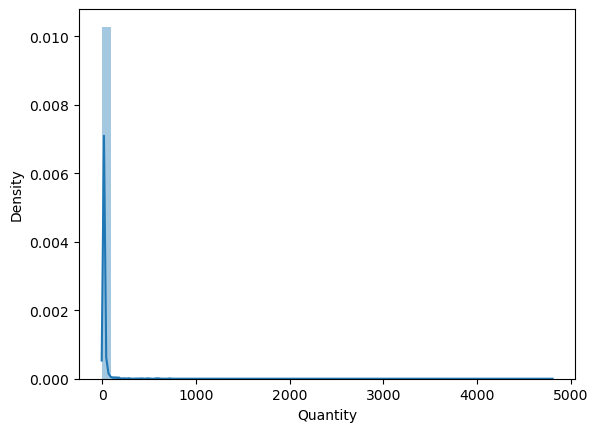

In [69]:
sns.distplot(filtered.Quantity)

In [70]:
# TEST IT IN REGRESSION
# sparse vector proble 
weekday = filtered.InvoiceDate.dt.weekday.astype('category')
country = filtered.Country.astype('category')

### 4. Feature engineering

Creating new variables will help to find more relations in data. They may be used in later analysis as well.

In [71]:
filtered['Revenue'] = filtered['Quantity'] * filtered['UnitPrice']
filtered['OrderHour'] = filtered.InvoiceDate.dt.hour
filtered['OrderMonth'] = filtered.InvoiceDate.dt.month
filtered['OrderWeekday'] = filtered.InvoiceDate.dt.weekday
filtered

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,OrderHour,OrderMonth,OrderWeekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,8,12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,8,12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,12,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,12,12,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,12,12,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,12,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,12,4


In [72]:
filtered.to_csv("data/data_cleared.csv")

### 5. Exploring interaction of two or more variables

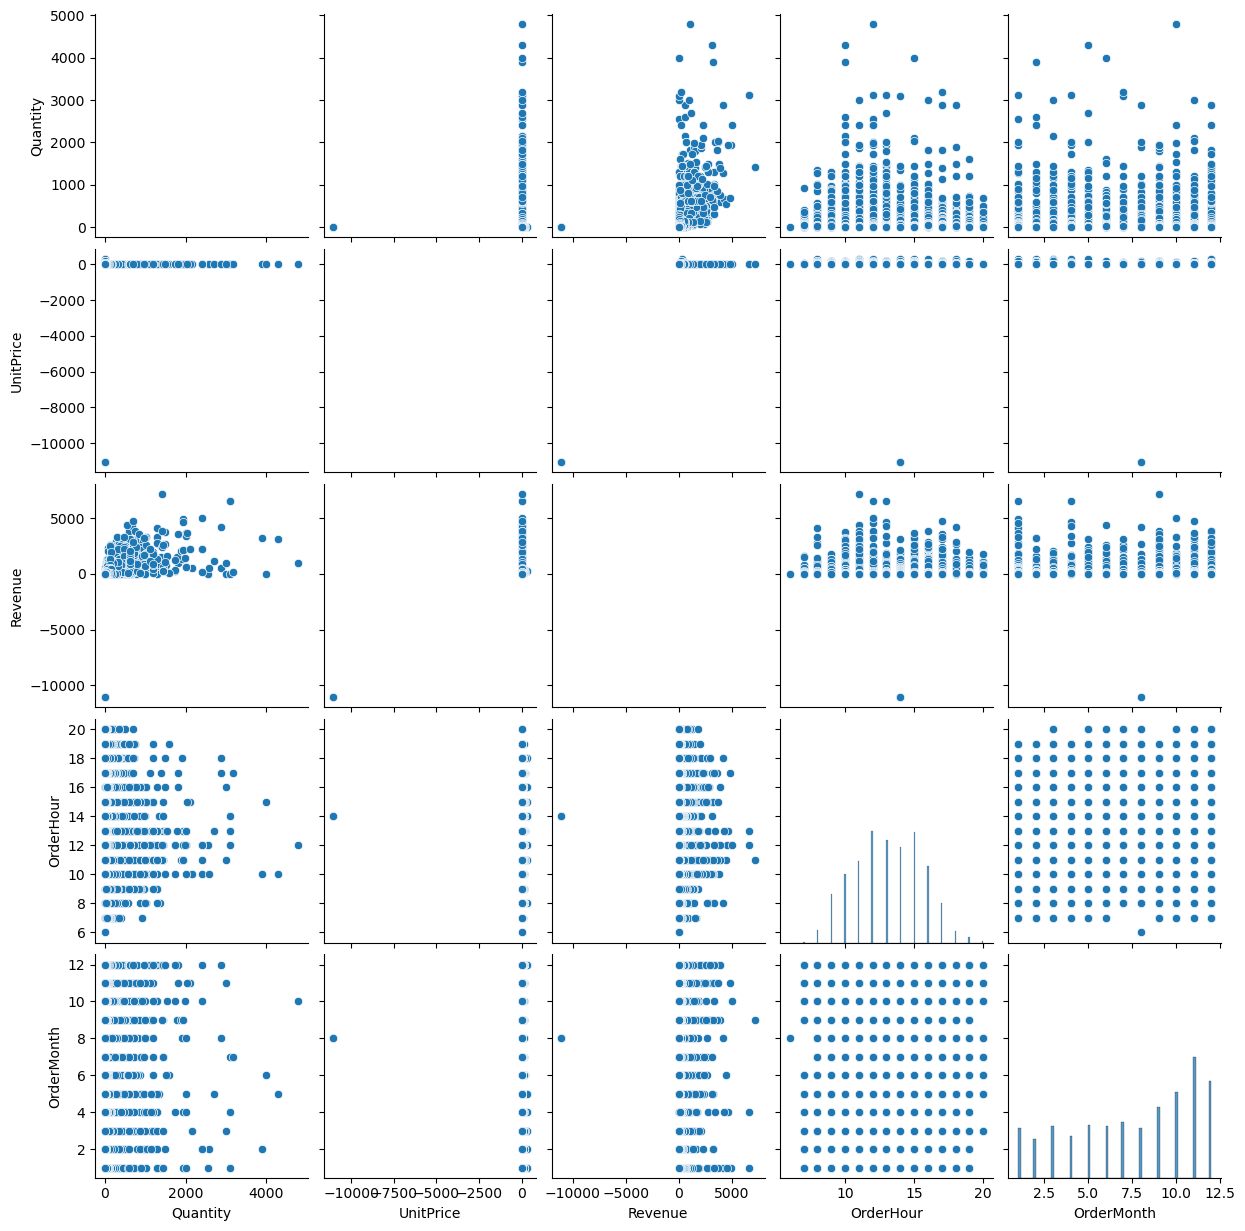

In [75]:
num_cols = ['Quantity', "UnitPrice", 'Revenue', 'OrderHour', 'OrderMonth']
# It may take long time to process
sns.pairplot(filtered, vars = num_cols)

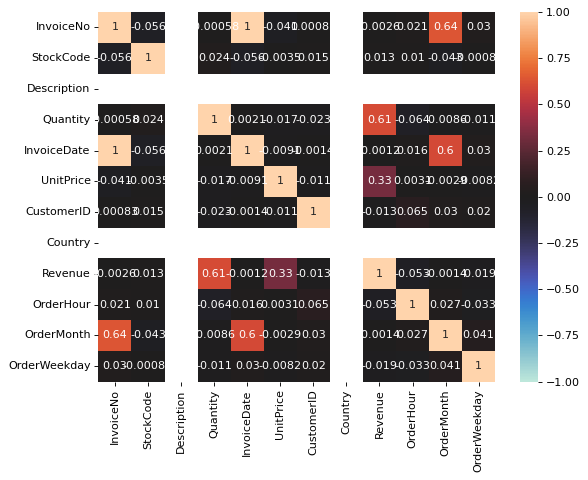

In [77]:
filtered = filtered.apply(pd.to_numeric, errors='coerce')
corr = filtered.corr()

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=corr)

The only relationship we can find is between Quantity and Total price, which has an obvious reason: TotalPrice was created from multiplying Quantity and Unit prices.

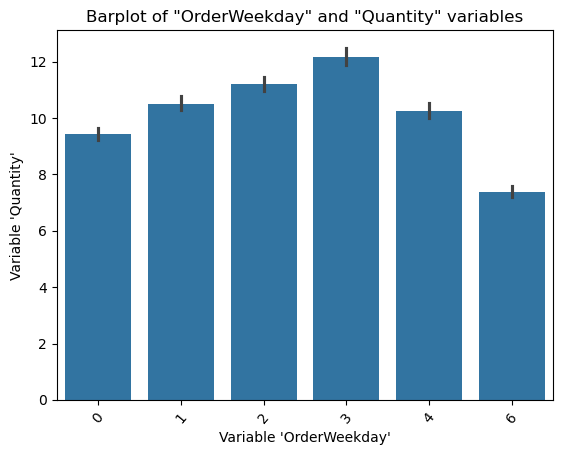

In [78]:
sns.barplot( x=filtered["OrderWeekday"], y = filtered["Quantity"] )
plt.title('Barplot of "OrderWeekday" and "Quantity" variables')
plt.xlabel("Variable 'OrderWeekday'")
plt.ylabel("Variable 'Quantity'")
plt.xticks(rotation=50)
plt.show()

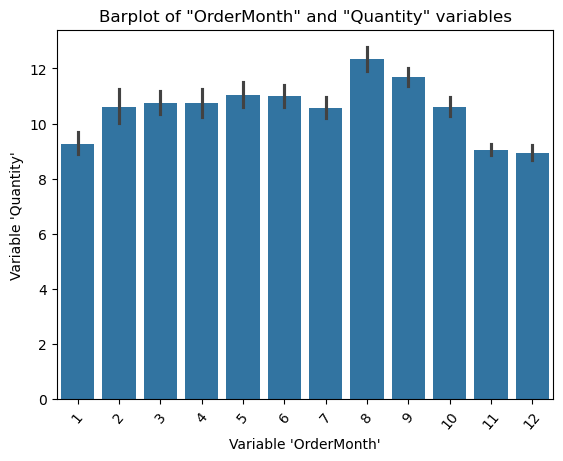

In [79]:
sns.barplot( x=filtered["OrderMonth"], y = filtered["Quantity"] )
plt.title('Barplot of "OrderMonth" and "Quantity" variables')
plt.xlabel("Variable 'OrderMonth'")
plt.ylabel("Variable 'Quantity'")
plt.xticks(rotation=50)
plt.show()

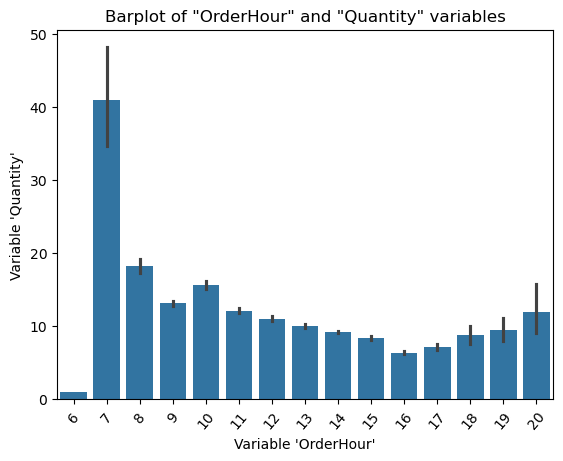

In [80]:
sns.barplot( x=filtered["OrderHour"], y = filtered["Quantity"] )
plt.title('Barplot of "OrderHour" and "Quantity" variables')
plt.xlabel("Variable 'OrderHour'")
plt.ylabel("Variable 'Quantity'")
plt.xticks(rotation=50)
plt.show()

The relation between time variables and 'Quantity' variable:

- Minimum order quantity reached on Sunday.
- November has the least quantity of ordered products. 
- Customers usually make purchases at 7am.

**Conclusion**

This is just an example of EDA and data preprocessing that you can conduct. You can dig deeper, find more relationships, add more data and everything you can think of. This is an art and you're the master!

More importantly, this is just the beginning. We will use this data, knowledge and intuition, which we obtained as a result of this analysis, to go further and solve many problems related to customer behavior.

**Further Reading**
<br>
[1] [Doing Data Science](https://www.oreilly.com/library/view/doing-data-science/9781449363871/)
<br>
[2] [R for Marketing Research and Analytics](https://www.springer.com/gp/book/9783030143152)